## PCA

# IRIS

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # Ejemplo con dataset de flores

### CARGA Y EXPLORACION DE DATOS

In [2]:
# Cargar dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target (clases)
feature_names = data.feature_names

# Convertir a DataFrame para exploración
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y  # Añadir columna de clase

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

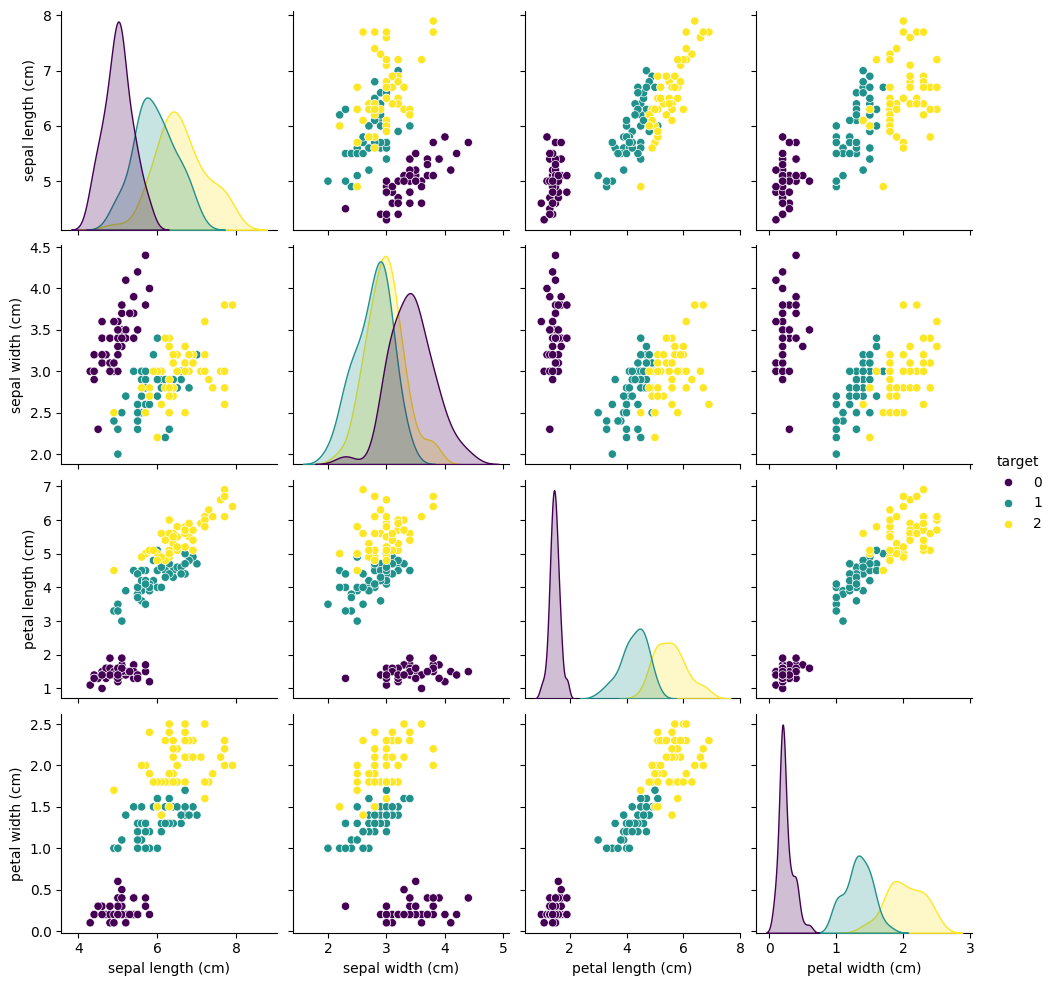

In [3]:
print(df.head())
print(df.describe())
sns.pairplot(df, hue='target', palette='viridis')
plt.show()

## Preprocesamiento de datos

In [4]:
# Separar features y target
X = df.drop('target', axis=1)
y = df['target']

# Estandarizar (media=0, varianza=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [5]:
# Crear objeto PCA (usaremos 2 componentes para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame para mejor manejo
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

Varianza explicada por cada componente: [0.72962445 0.22850762]
Varianza acumulada: [0.72962445 0.95813207]


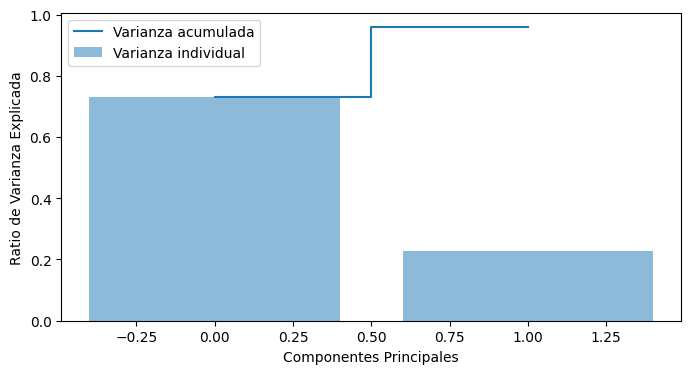

In [6]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", np.cumsum(pca.explained_variance_ratio_))

# Gráfico de varianza explicada
plt.figure(figsize=(8, 4))
plt.bar(range(2), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Varianza individual')
plt.step(range(2), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Varianza acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend()
plt.show()

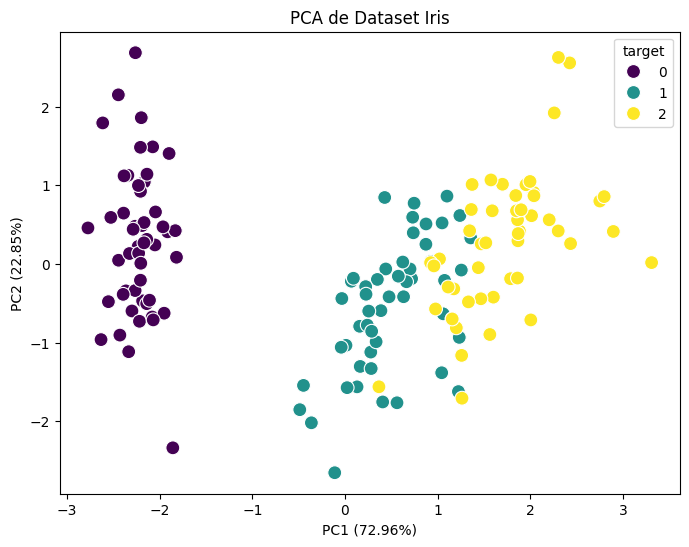

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis', s=100)
plt.title('PCA de Dataset Iris')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.show()

## ANALISIS DE COMPONENTES

Cargas de los componentes:
                         PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942


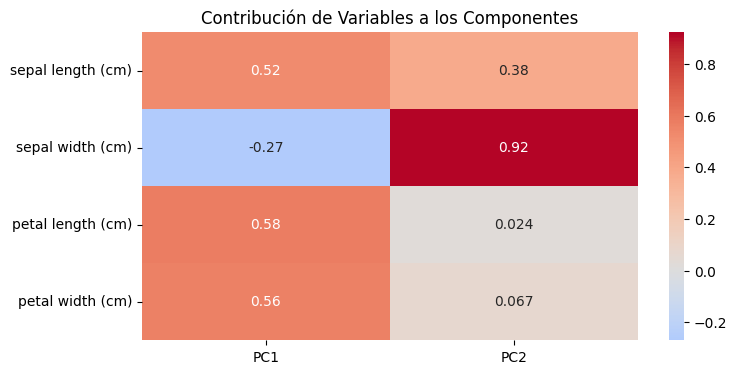

In [9]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
print("Cargas de los componentes:\n", loadings)

# Heatmap de cargas
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Contribución de Variables a los Componentes')
plt.show()

In [10]:
X_reconstructed = pca.inverse_transform(X_pca)

### APLICACIÓN A UN MODELO ML

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Aplicar PCA (ejemplo con 3 componentes)
pca_ml = PCA(n_components=3)
X_train_pca = pca_ml.fit_transform(X_train)
X_test_pca = pca_ml.transform(X_test)

# Entrenar modelo
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Precisión: 1.00


# WINE

In [13]:
# Cargar datos
df = pd.read_csv('winequality-white.csv')

# Información general
print("Filas y columnas:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())

# Tipos de datos y valores faltantes
print("\nResumen de tipos de datos y NaN:")
print(df.info())

# Descripción estadística
print("\nEstadísticas descriptivas:")
print(df.describe())

Filas y columnas: (4898, 1)

Primeras 5 filas:
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                   

In [14]:
import pandas as pd

# Cargar el dataset con el separador correcto
datos = pd.read_csv('winequality-white.csv', sep=';')

# Verificar
print(datos.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

Columnas originales: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Primeras 5 filas:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3          

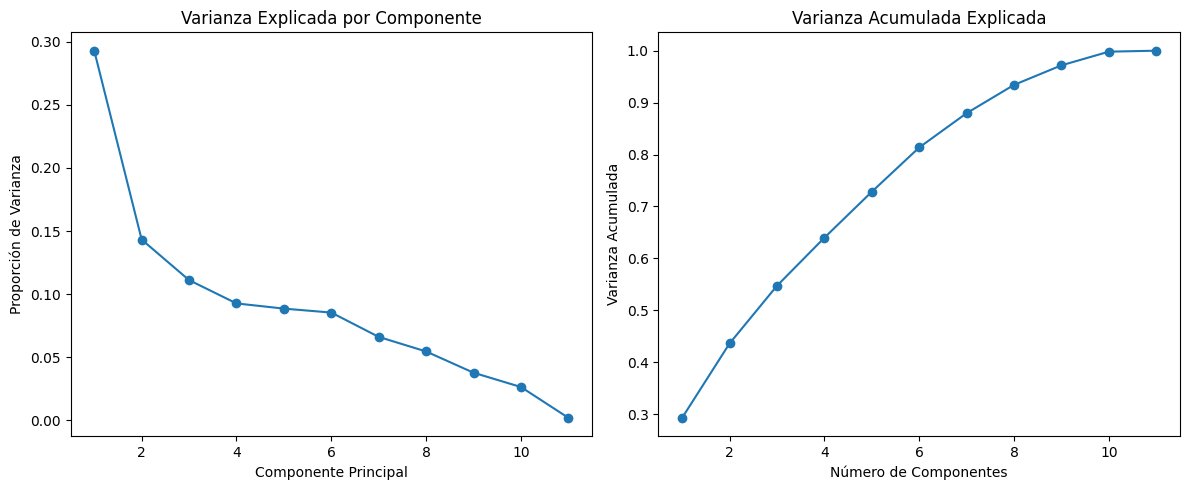

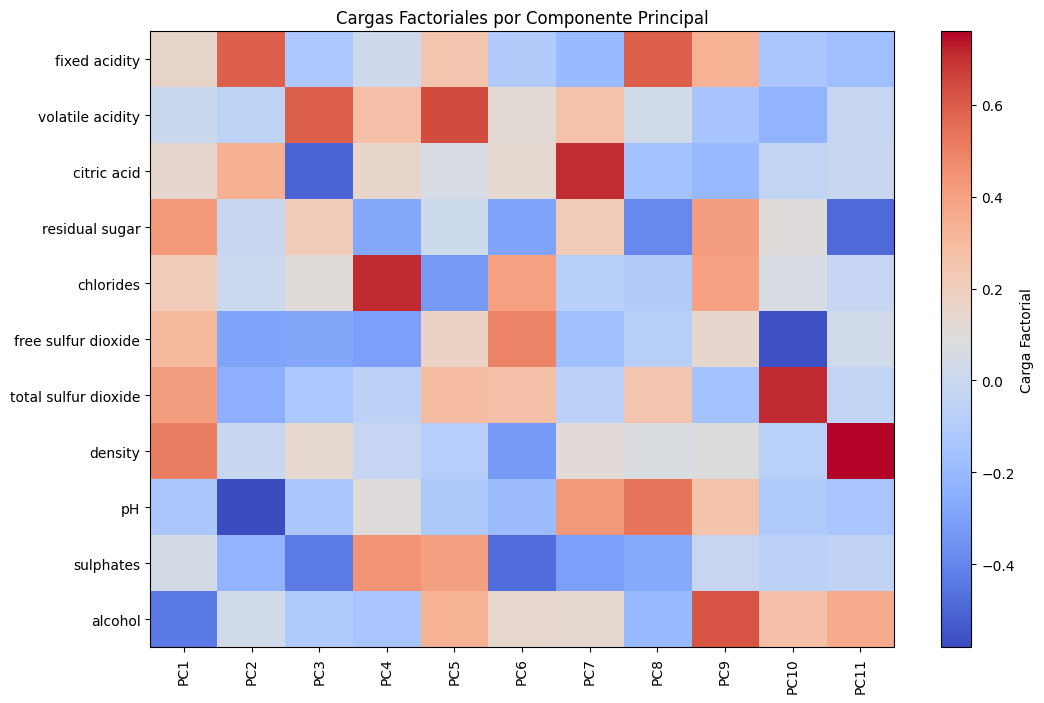

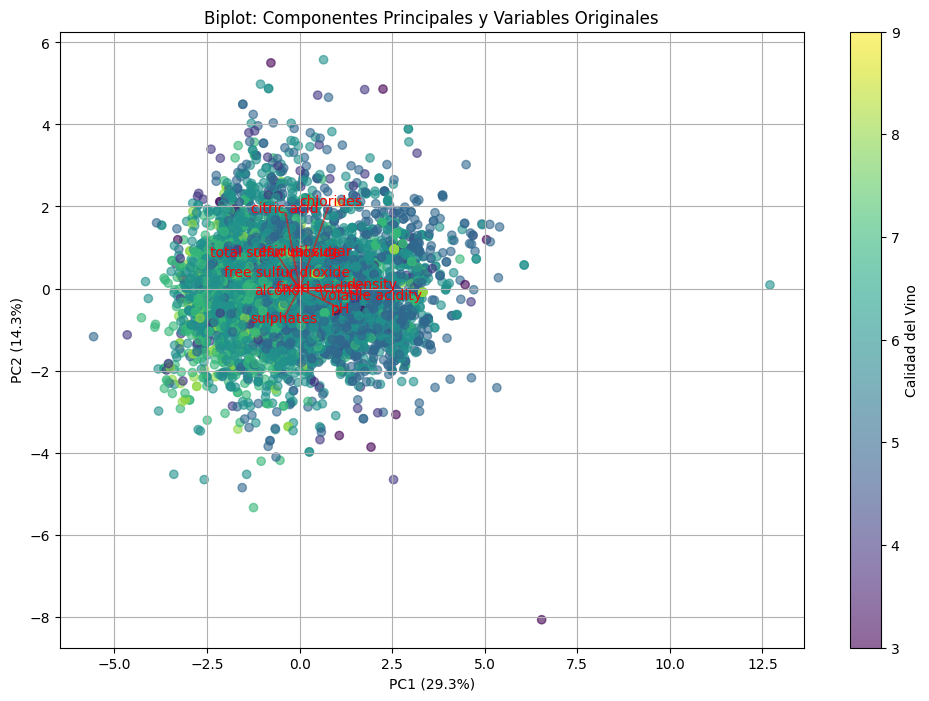


Componentes para 95% de varianza: 9
Varianza explicada por cada componente:
[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar datos
df = pd.read_csv('winequality-white.csv', sep=';')

# Verificar estructura
print("Columnas originales:", df.columns.tolist())
print("\nPrimeras 5 filas:\n", df.head())
print("\nResumen estadístico:\n", df.describe())

# Separar características y target
X = df.drop('quality', axis=1)
y = df['quality']

# Estandarización (crucial para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA completo
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Análisis de Varianza Explicada
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_, 'o-')
plt.title('Varianza Explicada por Componente')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.title('Varianza Acumulada Explicada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.tight_layout()
plt.show()

# 2. Heatmap de Cargas Factoriales
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(X.shape[1])],
                        index=X.columns)

plt.figure(figsize=(12, 8))
plt.imshow(loadings, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Carga Factorial')
plt.xticks(range(loadings.shape[1]), loadings.columns, rotation=90)
plt.yticks(range(loadings.shape[0]), loadings.index)
plt.title('Cargas Factoriales por Componente Principal')
plt.show()

# 3. Biplot mejorado
def biplot(score, loadings, labels, y, scale=1):
    xs = score[:,0]
    ys = score[:,1]
    n = loadings.shape[0]
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(xs, ys, c=y, cmap='viridis', alpha=0.6)
    
    for i in range(n):
        plt.arrow(0, 0, loadings[i,0]*scale, loadings[i,1]*scale, 
                  color='r', alpha=0.5, head_width=0.05)
        plt.text(loadings[i,0]*scale*1.1, loadings[i,1]*scale*1.1,
                 labels[i], color='r', ha='center', va='center')
    
    plt.colorbar(scatter, label='Calidad del Vino')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    plt.title('Biplot: Componentes Principales y Variables Originales')
    plt.grid()

biplot(X_pca[:,:2], loadings.values[:2,:].T, X.columns, y, scale=3)
plt.show()

# 4. Selección óptima de componentes
cum_var = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.where(cum_var >= 0.95)[0][0] + 1
print(f"\nComponentes para 95% de varianza: {optimal_components}")
print(f"Varianza explicada por cada componente:\n{pca.explained_variance_ratio_}")


Métricas de evaluación del modelo:
RMSE: 0.61
R²: 0.52

Comparación con modelo sin PCA:
RMSE (sin PCA): 0.59
R² (sin PCA): 0.55


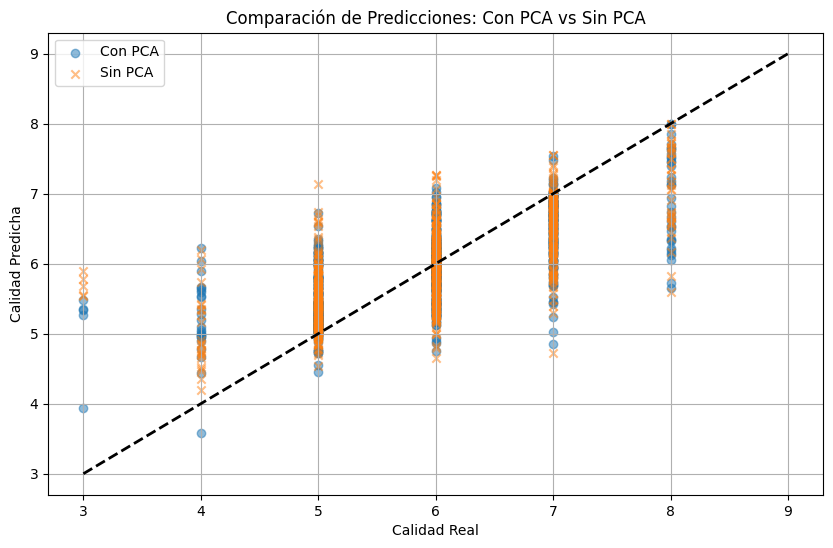

In [18]:
# --- Continuación del código anterior ---

# 5. Reducción de dimensionalidad con las componentes óptimas
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# 6. Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_optimal, y, test_size=0.2, random_state=42)

# 7. Entrenar un modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nMétricas de evaluación del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 9. Comparar con modelo SIN PCA
# Entrenar un modelo sin reducción de dimensionalidad
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_baseline = RandomForestRegressor(n_estimators=100, random_state=42)
model_baseline.fit(X_train_original, y_train_original)

y_pred_baseline = model_baseline.predict(X_test_original)

# Métricas de evaluación sin PCA
rmse_baseline = np.sqrt(mean_squared_error(y_test_original, y_pred_baseline))
r2_baseline = r2_score(y_test_original, y_pred_baseline)

print("\nComparación con modelo sin PCA:")
print(f"RMSE (sin PCA): {rmse_baseline:.2f}")
print(f"R² (sin PCA): {r2_baseline:.2f}")

# 10. Visualizar predicciones vs realidad
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Con PCA')
plt.scatter(y_test_original, y_pred_baseline, alpha=0.5, label='Sin PCA', marker='x')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Calidad Real')
plt.ylabel('Calidad Predicha')
plt.title('Comparación de Predicciones: Con PCA vs Sin PCA')
plt.legend()
plt.grid()
plt.show()